In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import numpy as np
import os
from img_manager import *

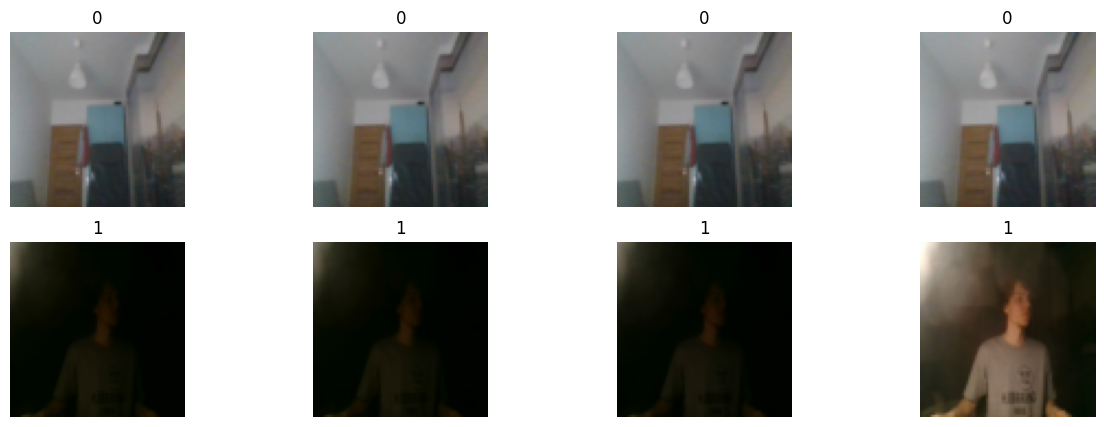

In [11]:
DIR = 'img/test/'
images, labels = load_data(DIR)


plt.figure(figsize=(15, 5))

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.axis('off')
    plt.title(labels[i])
    plt.imshow(images[i])
plt.show()

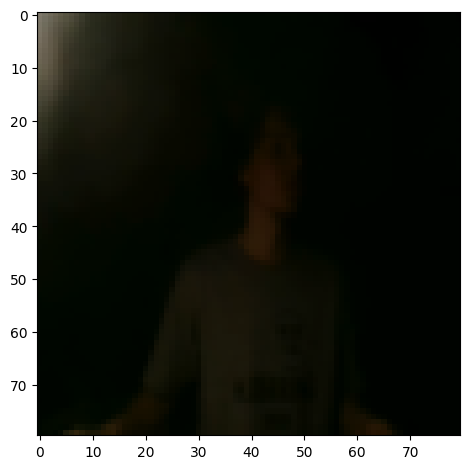

In [4]:
imshow(images[6])